In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px

# Corrected way to read the CSV file using a relative or absolute path
file_path = r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-12\data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [9]:
# Descriptive Statistics
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


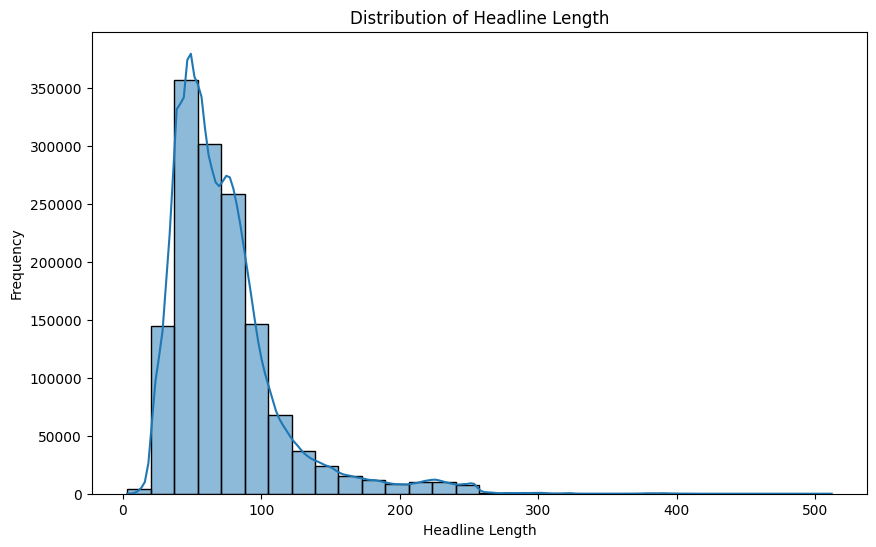

In [10]:
# 1. Article length analysis
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

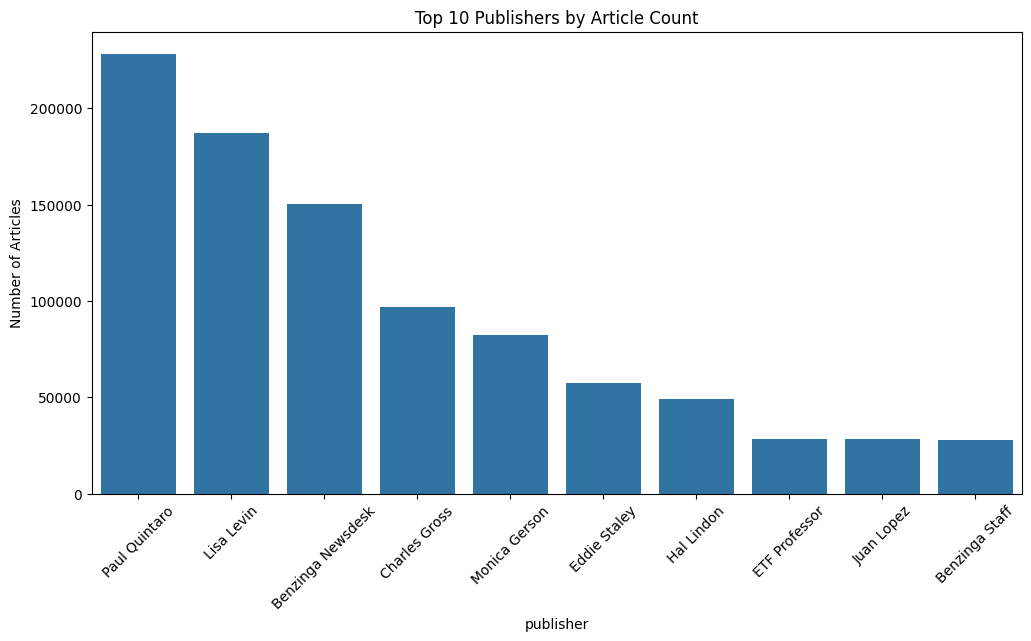

In [11]:
# 2. Publication Count by Publisher
publisher_count = df['publisher'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_count.index[:10], y=publisher_count.values[:10])
plt.title('Top 10 Publishers by Article Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Articles')
plt.show()

In [18]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')

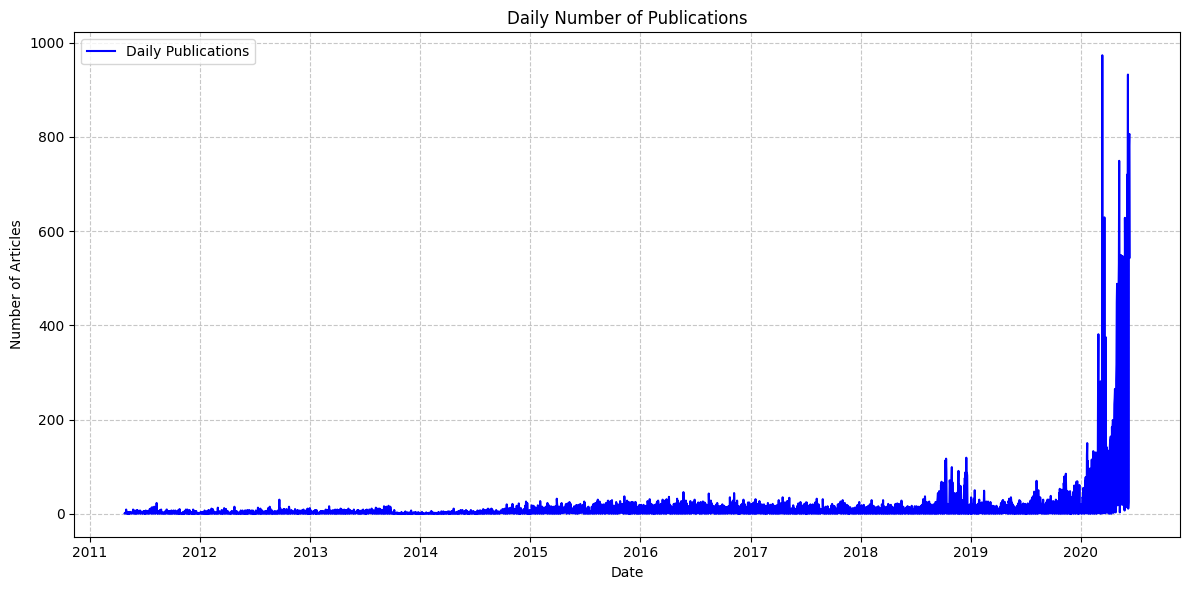

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# File path to your dataset
file_path = r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-12\data\raw_analyst_ratings.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Ensure the dataset is loaded correctly
if df is not None and not df.empty:
    # Convert 'date' column to datetime and handle parsing errors
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates

    # Set 'date' as the index for time series analysis
    df.set_index('date', inplace=True)

    # Resample data to get daily counts of publications
    daily_publications = df.resample('D').size()

    # Plot the time series data if resampling is successful
    if not daily_publications.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(daily_publications, label='Daily Publications', color='blue')
        plt.title('Daily Number of Publications')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for the selected date range.")
else:
    print("Error: Failed to load dataset or dataset is empty.")


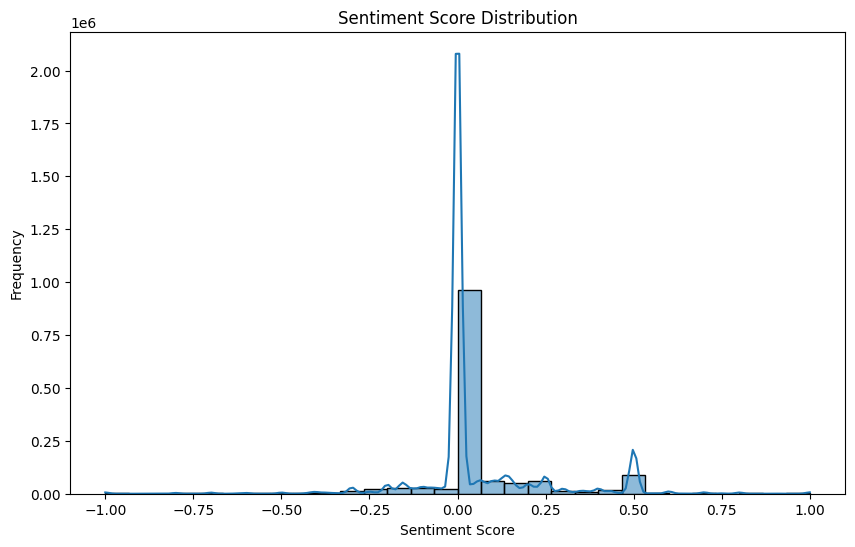

In [22]:
# 4. Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_score'] = df['headline'].apply(analyze_sentiment)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

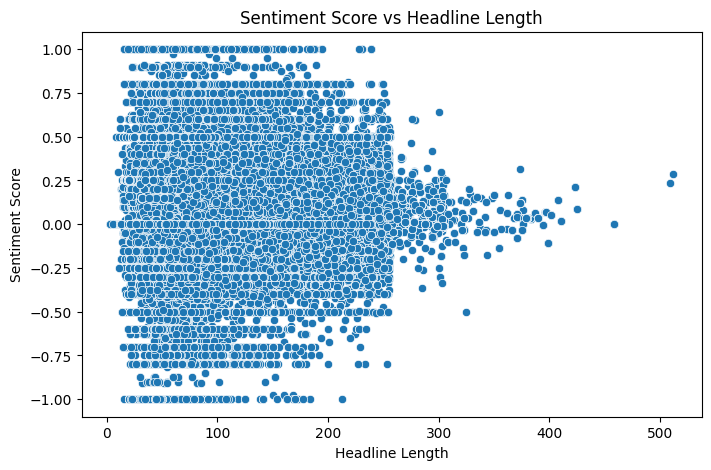

In [23]:
# Display correlation between sentiment and headline length
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['headline_length'], y=df['sentiment_score'])
plt.title('Sentiment Score vs Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Sentiment Score')
plt.show()